<a href="https://colab.research.google.com/github/salimyahuza/StudySprint-Tracker/blob/main/Student_Study_Progress_Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Study Tracker - Google Colab Notebook

## 🔰 Introduction

This notebook helps you:
- Record daily study activities
- View motivational quotes
- Visualize your progress
- Export logs to a CSV file

---

## 🧠 Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import datetime

In [2]:
quotes = [
    "Success doesn’t come from what you do occasionally, it comes from what you do consistently.",
    "Don’t watch the clock; do what it does. Keep going.",
    "Small progress is still progress.",
    "Push yourself, because no one else is going to do it for you.",
    "It’s not about having time, it’s about making time."
    "The only way to do great work is to love what you do."
    "Your work is going to fill a large part of your life. Do what you believe is great work."
    "Your present circumstances don't determine where you can go; they merely determine where you start."
    "It's not whether you get knocked down, it's whether you get up."
    "Through the toughest battles, you emerge stronger and wiser."
    "Courage isn't always a roar. Sometimes it's the quiet voice saying, 'I'll try again tomorrow.'"
    "An investment in knowledge pays the best interest."
    "Education is the most powerful weapon which you can use to change the world."
    "Develop a passion for learning. If you do, you will never cease to grow."
    "Success is the sum of small efforts, repeated daily."
    "Great things never come from comfort zones."
    "Consistency is more important than perfection."
    "The mind is not a vessel to be filled, but a fire to be kindled."
    "Fall seven times, stand up eight."
    "Opportunities don't happen, you create them."
    "Learn as if you will live forever, live as if you will die tomorrow."
    "The secret of getting ahead is getting started."
    "Setting goals is the first step in turning the invisible into the visible."
    "Strive for progress, not perfection."
    "Defeat is simply the addition of time to change direction."
    "Believe you can and you're halfway there."
    "Preparation is the key to success."
    "The expert in anything was once a beginner."
    "Obstacles don't stop you. They help you discover your inner strengths."
    "Resilience is accepting your new reality, even if it's less good than the one you had before."
    "It does not matter how slowly you go as long as you do not stop."
    "Life doesn't get easier; we get stronger and more resilient."
    "Don't watch the clock; do what it does. Keep going."
    "That which does not kill us makes us stronger."
    "Success usually comes to those who are too busy to be looking for it."
    "Your greatest struggles will be your greatest lessons."
    "Small steps every day add up to big results."

]

with open("quotes.txt", "w") as file:
    for q in quotes:
        file.write(q + "\n")
print("✅ quotes.txt file created.")


✅ quotes.txt file created.


## 💬 Motivational Quote of the Day

In [3]:
with open("quotes.txt", "r") as file:
    quotes = [line.strip() for line in file if line.strip()]

quote_of_the_day = random.choice(quotes)
print("\n✨ Quote of the Day ✨")
print("-" * len(quote_of_the_day))
print(quote_of_the_day)
print("-" * len(quote_of_the_day))


✨ Quote of the Day ✨
---------------------------------
Small progress is still progress.
---------------------------------


In [4]:
%%writefile quotes.txt
The only way to do great work is to love what you do. - Steve Jobs
Believe you can and you're halfway there. - Theodore Roosevelt
The future belongs to those who believe in the beauty of their dreams. - Eleanor Roosevelt
Strive not to be a success, but rather to be of value. - Albert Einstein
Your limitation—it's only your imagination.

Overwriting quotes.txt


## 📝 Log Today's Study Session

In [5]:
# Define log structure
log_entry = {}
log_entry['Date'] = datetime.now().strftime("%Y-%m-%d")
log_entry['Subject'] = input("Subject/Topic: ")
log_entry['Hours Studied'] = float(input("Hours Studied: "))
log_entry['What You Learned'] = input("What did you learn today? ")
log_entry['Challenges Faced'] = input("Any challenges? ")

Subject/Topic: Linear algebra
Hours Studied: 3
What did you learn today? Matrices
Any challenges? Yes, very challenging!


In [6]:
# Load updated_df if it doesn't already exist
try:
    updated_df
except NameError:
    import pandas as pd
    try:
        updated_df = pd.read_csv('study_log.csv')
    except FileNotFoundError:
        print("No study log found. Please log at least one study session first.")
        updated_df = pd.DataFrame(columns=["Date", "Subject", "Hours Studied", "Notes"])

# Convert 'Date' to datetime just in case
updated_df['Date'] = pd.to_datetime(updated_df['Date'], errors='coerce')

# Search by subject or date
search_input = input("🔍 Enter a subject or date (YYYY-MM-DD) to filter logs: ").strip()

# Attempt date filtering if the input looks like a date
try:
    filtered_logs = updated_df[updated_df['Date'] == pd.to_datetime(search_input)]
except:
    # Otherwise filter by subject (case-insensitive)
    filtered_logs = updated_df[updated_df['Subject'].str.contains(search_input, case=False, na=False)]

# Display the result
if not filtered_logs.empty:
    print("\n📝 Matching Study Logs:\n")
    display(filtered_logs)
else:
    print("\n🚫 No matching study sessions found.")


No study log found. Please log at least one study session first.
🔍 Enter a subject or date (YYYY-MM-DD) to filter logs: 2025-07-22

🚫 No matching study sessions found.


## 📚 Load or Create Study Log CSV

In [7]:
try:
    df_log = pd.read_csv("study_log.csv")
except FileNotFoundError:
    df_log = pd.DataFrame(columns=['Date', 'Subject', 'Hours Studied', 'What You Learned', 'Challenges Faced'])

# Append new entry and save
updated_df = pd.concat([df_log, pd.DataFrame([log_entry])], ignore_index=True)
updated_df.to_csv("study_log.csv", index=False)

/tmp/ipython-input-7-712912354.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  updated_df = pd.concat([df_log, pd.DataFrame([log_entry])], ignore_index=True)


## 📊 Visualize Study Progress

/tmp/ipython-input-8-3200820275.py:6: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


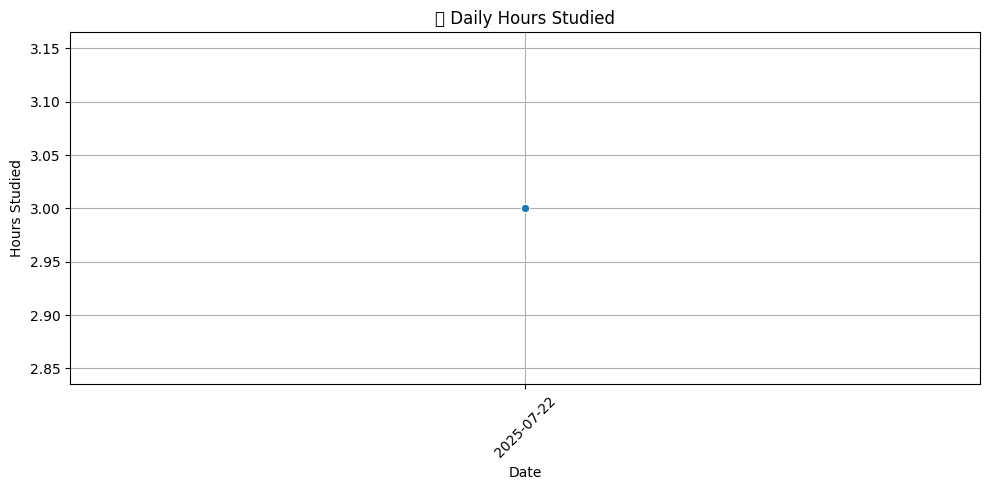

/tmp/ipython-input-8-3200820275.py:13: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


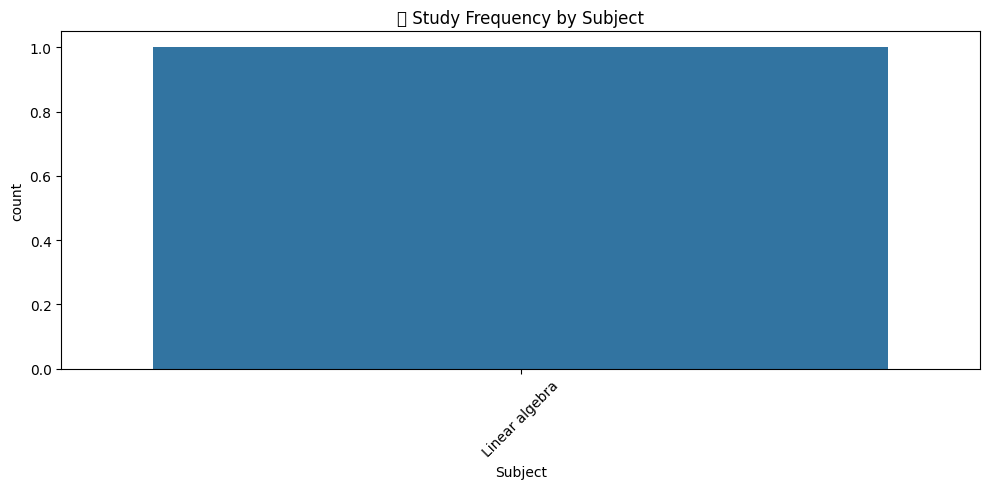

In [8]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=updated_df, x="Date", y="Hours Studied", marker='o')
plt.xticks(rotation=45)
plt.title("📈 Daily Hours Studied")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=updated_df, x="Subject", order=updated_df['Subject'].value_counts().index)
plt.xticks(rotation=45)
plt.title("📚 Study Frequency by Subject")
plt.tight_layout()
plt.show()

## 📤 Export Study Log to CSV

In [9]:
import os
if os.path.exists("study_log.csv"):
    from google.colab import files
    files.download("study_log.csv")
else:
    print("⚠️ File 'study_log.csv' does not exist.")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
from google.colab import files
files.download("study_log.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ✅ Final Note


You can run this notebook every day to:
- Stay consistent
- Track growth
- Stay inspired 🎯

In [11]:
!pip install calmap

In [12]:
import calmap

# Convert date column to datetime
updated_df['Date'] = pd.to_datetime(updated_df['Date'], errors='coerce')

# Create a Series with dates as index and hours studied as values
study_series = updated_df.groupby('Date')['Hours Studied'].sum()

# Plot the calendar heatmap only if there's more than one date
if study_series.shape[0] > 1:
    plt.figure(figsize=(16, 6))
    calmap.calendarplot(study_series, cmap='YlGn', fillcolor='lightgray', linewidth=0.5)
    plt.suptitle('📅 Study Consistency Calendar Heatmap', fontsize=16)
    plt.show()
else:
    print("📅 Not enough data for heatmap. Log more study sessions on different dates.")


📅 Not enough data for heatmap. Log more study sessions on different dates.


### 🔒 Google Calendar Integration (Disabled for Demo)

This section includes optional Google Calendar integration for setting reminders.

It is **disabled** in this demo to avoid browser-based authentication prompts that may interrupt reviewers.

To enable:
1. Upload your own `credentials.json` from Google Cloud Console.
2. Uncomment the code block below.
3. Call `add_study_reminder()` after logging your study session.


In [18]:
import os.path
import pickle
from google.auth.transport.requests import Request
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build
import datetime

def authenticate_google_calendar():
    SCOPES = ['https://www.googleapis.com/auth/calendar']
    creds = None

    if os.path.exists('token.pickle'):
        with open('token.pickle', 'rb') as token:
            creds = pickle.load(token)

    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file('credentials.json', SCOPES)
            creds = flow.run_local_server(port=0, auth_local_webserver=False)

        with open('token.pickle', 'wb') as token:
            pickle.dump(creds, token)

    service = build('calendar', 'v3', credentials=creds)
    return service

In [14]:
def add_study_reminder(subject, date_str, time_str, duration_minutes=60):
    service = authenticate_google_calendar()

    start_time = datetime.datetime.strptime(f"{date_str} {time_str}", "%Y-%m-%d %H:%M")
    end_time = start_time + datetime.timedelta(minutes=duration_minutes)

    event = {
        'summary': f'Study: {subject}',
        'description': f'Study session for {subject}',
        'start': {
            'dateTime': start_time.isoformat(),
            'timeZone': 'Africa/Lagos',
        },
        'end': {
            'dateTime': end_time.isoformat(),
            'timeZone': 'Africa/Lagos',
        },
        'reminders': {
            'useDefault': True,
        },
    }

    event = service.events().insert(calendarId='primary', body=event).execute()
    print(f"✅ Study reminder for '{subject}' added on {start_time.strftime('%Y-%m-%d %H:%M')}")


### 📧 Email Reminder (Mock)

This notebook uses a mock email reminder function for demo purposes.

To enable real email reminders:
- Use Gmail SMTP
- Generate an App Password
- Replace the mock function with secure SMTP logic (see documentation or ask the author 😉)


In [15]:
def send_email_reminder(subject, body, to_email):
    print(f"📧 (Mock) Email reminder to {to_email}:\nSubject: {subject}\nMessage: {body}")

In [16]:
# 🔒 Mock Email Reminder Example
send_email_reminder(
    subject="Study Reminder: Python Programming",
    body="Hi Salim, don't forget to study Python Programming at 8:00 PM today.",
    to_email="salim@example.com"
)


📧 (Mock) Email reminder to salim@example.com:
Subject: Study Reminder: Python Programming
Message: Hi Salim, don't forget to study Python Programming at 8:00 PM today.


### 🛑 Reminder Feature Note

Google Calendar integration is included but disabled in this demo version.  
To enable it, set up your `credentials.json` and uncomment the reminder line in the code cell below.

In [17]:
# 🔒 Disabled for demo: Enable this line if you’ve set up Google Calendar credentials
# add_study_reminder("Python Programming", "2025-07-23", "20:00", duration_minutes=90)
